In [1]:
file_name ="e:/Video/AResh/2023/NU_Stag/Gavrilov_stag/Статьи с Telegram.txt"
with open(file_name,"r", encoding="utf-8") as f:
    text = f.read()
text

'\ufeffПосты за 2021 год        5\nМой опыт инвестиций        5\nДавно не рассказывал про то, как бороться с бардаком в бизнесе, пора это исправить.        6\nИнвест новости прошедшей недели        6\n500% доходность на IPO 🙄        6\nКак получить большую аллокацию?        7\nСегодня подал заявки на участие в 3х #IPO        7\nИнвест новости прошедшей недели        7\nКак участвовать в IPO        7\nНе сравнивай месяц с месяцем 🙈        8\nВ Сколково проводится множество мероприятий каждый день. И о том как бизнес строить и как стартап питчить и о менеджменте и HR и множество другого полезного контента.        8\nВыход из кризиса в цифрах        8\nКуда я еще инвестирую?        8\nСервис для аренды пауэрбэнков «Бери заряд!» привлек 431 млн рублей от группы частных инвесторов, в ходе раунда компанию оценили в 1,35 млрд рублей.        9\nА еще на прошлой неделе        9\nНовости прошедшей недели        9\nКиллер фича от МегаФона, про которую ты скорее всего не знаешь        10\nКто хоче

In [2]:
ar = text.split("\n")


In [3]:
if ar[0][:1]=='\ufeff':
    ar[0]=ar[0][1:]
s=ar[0]
num =s[-4:].strip()
if num.isnumeric():
    n= int(num)
    print(n)

5


In [4]:
i_done=0
contents = []
for i, s in enumerate(ar):
    num:str = s[-4:].strip()
    if num.isnumeric():
        i_done = i
        n = int(num)
        item = (s[:-4].strip(),n)
        #print(item)
        contents.append(item)
    else:
        break

print(ar[i_done+1:])

['Посты за 2021 год', '##_', 'Мой опыт инвестиций ', '#инвестиции #IPO', '‼️Все что я буду тут писать про инвестиции - это мой опыт. Опыт профана, поэтому я могу ошибаться в терминах и в принципах. Можете корректировать меня и конечно же не стоит пользоваться моим опытом и советами, если вдруг я начну что-то советовать. И тем более потом писать мне, что вы потеряли все деньги 👻', 'Весь мой опыт начался с инвестиций через Тинькофф 📲. Удобное приложение - за несколько кликов и я стал инвестором Теслы, Майкрософт, Apple, Salesforce и других гигантов. С полной готовностью все потерять 🕺', 'Когда начался ковид 🦠, я несколько раз заходил в приложение, наблюдал как каждый день я теряю по несколько процентов и перестал туда даже заходить 📉 Будь что будет. ', 'Но рынок бешенный - за год все выросло на 70% и я был мега happy от этого. Я продал почти все акции в сентябре 2020, прям за пару дней когда все начало обваливаться (фоточки выше, кружками на графике отмечены мои выходы) и было четкое ощу

In [5]:
import re
def f(s):
    m = re.search(r'Посты за (\d{4}) год',s[0])
    return m
r= list(filter(f,contents))
print(r)

[('Посты за 2021 год', 5), ('Посты за 2022 год', 28), ('Посты за 2023 год', 57)]


In [38]:
#contents

In [46]:
ar_t = ar[i_done+1:]
text=[]
is_h = True
is_h2= False
h="##_"
rl = [x[0] for x in r]
i_contents = 1
cont=[s[0] for s in contents]
c = cont[i_contents]
r2=0
h2 =""
if c in rl:
    i_contents+=1
    c = cont[i_contents]
for i, s in enumerate(ar_t):
    s=s.strip()
    found = False
    if s in cont[i_contents:]:
        j = cont[i_contents:].index(s)
        if j<4:
            i_contents+=j+1
            is_h1=False
            is_h2=False
            pre=""
            if h2==s:
                r2+=1
                pre =f"{r2+1}. "
            else:
                r2=0
                h2=s
            text.append("\n## "+pre+s)
            
            #print(s)
            found = True
            if i_contents<len(contents):
                c = contents[i_contents]
            if c in rl:
                i_contents+=1
                c = contents[i_contents]
    if found:
        pass
    elif s == c[0]:
        is_h1=False
        is_h2=False
        pre=""
        if h2==s:
            r2+=1
            pre =f"{r2+1}. "
        else:
            r2=0
            h2=s
        text.append("\n## "+pre+s)
        #print(s)
        i_contents+=1
        if i_contents<len(contents):
            c = contents[i_contents]
        if c[0] in rl:
            i_contents+=1
            c = contents[i_contents]
    elif s=="":
        is_h=True
    elif s==h:
        is_h2=True
        is_h= False
    elif is_h:
        pre=""
        if s in rl:
            #print(s)
            pre = "\n# "
        text.append(pre+s)
        is_h=False
    else:
        is_h = False
        if is_h2:
            is_h2=False
            text.append("\n## "+s)
        else:
            if s.startswith("#"):
                r3+=1
                s=f"\n###  "+s[1:].strip()
            text.append(s)
# with open("out.md","w",encoding="utf-8") as f:
#     f.write("\n".join(text))
# print("\n".join(text))
    

In [47]:
with open("out.md","w",encoding="utf-8") as f:
     f.write("\n".join(text))
#print("\n".join(text))

In [11]:
cont=[s[0] for s in contents]
s="Не сравнивай месяц с месяцем 🙈"
if s in cont:
    print(1)
else:
    print(0)
cont.index(s)

1


9

In [35]:
from langchain.text_splitter import MarkdownHeaderTextSplitter
import tiktoken
import matplotlib.pyplot as plt

def split_text( docs):
    headers_to_split_on = [
        ("#", "H1"),
        ("##", "H2"),
        ("###", "H3"),
    ]
    markdown_splitter = MarkdownHeaderTextSplitter(headers_to_split_on=headers_to_split_on)
    fragments =[]
    for ix, text in enumerate(docs):
        items = markdown_splitter.split_text(text)
        for i in items:
            s=""
            if "H3" in i.metadata:
                s = i.metadata["H3"]+"\n"+ s
            if "H2" in i.metadata:
                s = i.metadata["H2"]+"\n"+ s
            if "H1" in i.metadata:
                s = i.metadata["H1"]+"\n"+ s
            if s:
                i.page_content = s+ i.page_content
            i.metadata["ix"]=ix
        fragments.extend( items)
    return fragments


def num_tokens_from_string( string: str, encoding_name: str= "cl100k_base") -> int:
    """Возвращает количество токенов в строке"""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

def hist(fragments):
    fragment_token_counts = [num_tokens_from_string(fragment.page_content, "cl100k_base") for fragment in fragments]
    plt.hist(fragment_token_counts, bins=20, alpha=0.5, label='Fragments')
    plt.title('Distribution of Fragment Token Counts')
    plt.xlabel('Token Count')
    plt.ylabel('Frequency')
    plt.show()



In [39]:
fragments = split_text([ "\n".join(text)])

160


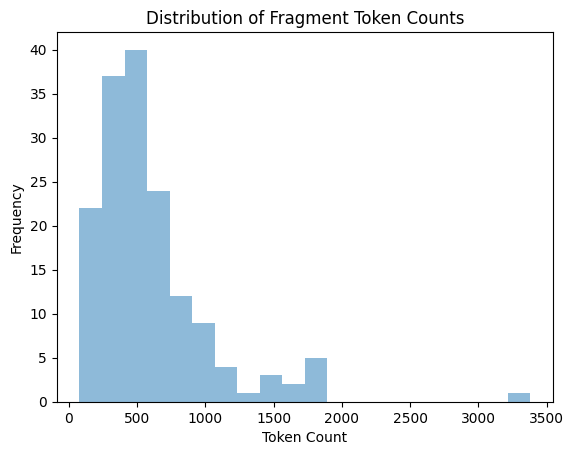

In [40]:
print(len(fragments))
hist(fragments)

In [43]:
large = [s for s in fragments if num_tokens_from_string(s.page_content)>2000]
print(large[0].metadata)
print(large[0].page_content)

{'H1': 'Посты за 2021 год', 'H2': 'Вовлечение. Чит коды публичных выступлений🎤', 'H3': 'выступления', 'ix': 0}
Посты за 2021 год
Вовлечение. Чит коды публичных выступлений🎤
выступления
Когда я начинаю выступление, я не говорю свою тему, я не представляю себя. Сначала я знакомлюсь с залом🙋🏼‍♂️
И я говорю так: «Ребята, поднимите руки те, у кого больше 100 людей в компании», соответсвенно, наступаю на бизнес тему и объясняю им зачем это нужно сделать.
То есть принцип такой: всегда объяснять то, зачем ты это спрашиваешь💁🏼‍♂️
Я говорю: «Ребят, давайте с вами познакомимся, про себя я расскажу чуть позже, но чтобы мне правильным образом сделать для вас выступление, чтобы я приводил нужные примеры, и чтобы я рассказывал именно то, что вам интересно, я хочу вас лучше узнать. Поэтому помогите мне с этим, чтобы я для вас сделал все круто». И задаю вопросы✔️
Таким образом я действительно узнаю зал, и бывает аудитория совершенно не та, о которой мне говорил организатор🙄
Например, были ситуации, ког